In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


In [7]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3876,-118.51,34.22,36,2794,523.0,1334,472,4.3462,222100
1509,-122.02,37.92,26,5077,640.0,1872,636,7.4713,351200
2989,-119.02,35.34,35,1650,390.0,1145,343,1.5357,56500
15908,-122.42,37.74,52,1916,432.0,889,424,4.0391,279900
18172,-122.02,37.36,24,1709,437.0,892,408,4.9671,335200
...,...,...,...,...,...,...,...,...,...
5815,-118.25,34.14,25,5980,1856.0,5217,1772,2.5060,184500
4440,-118.21,34.08,52,3672,808.0,3062,764,2.6806,153000
4670,-118.29,34.05,18,3585,1661.0,5229,1534,1.8470,250000
6042,-117.74,34.05,30,1185,317.0,1466,302,2.6250,94300


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

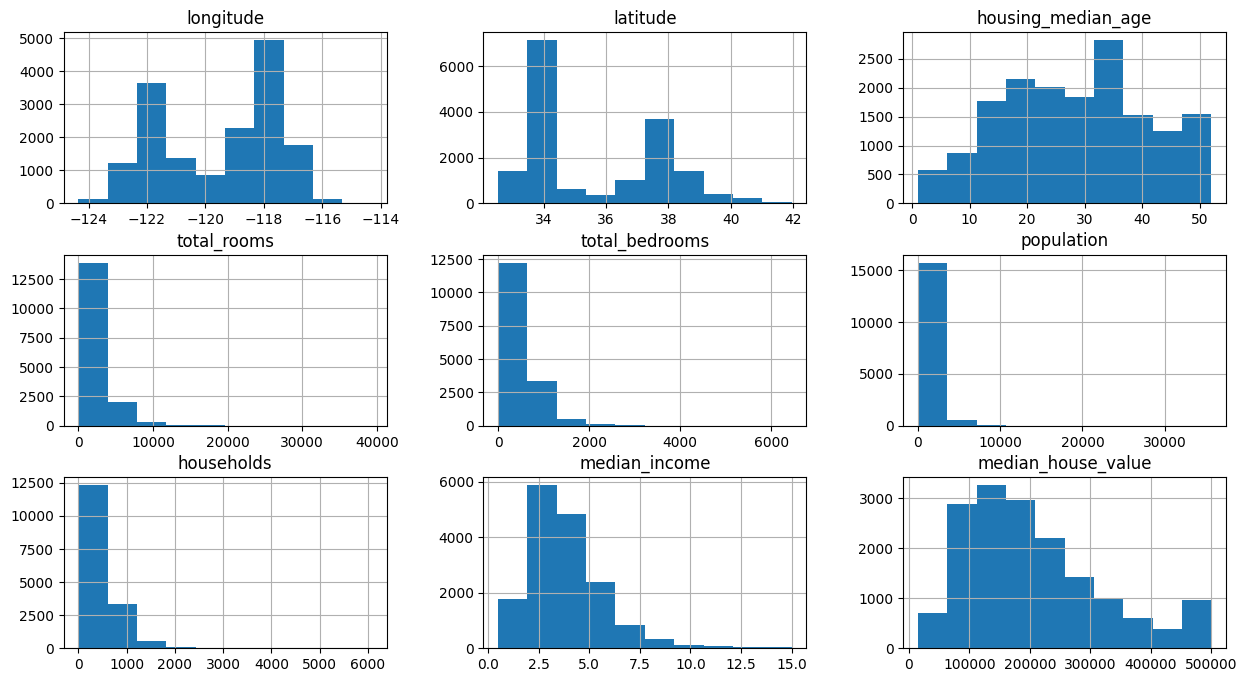

In [11]:
train_data.hist(figsize=(15, 8))

<Axes: >

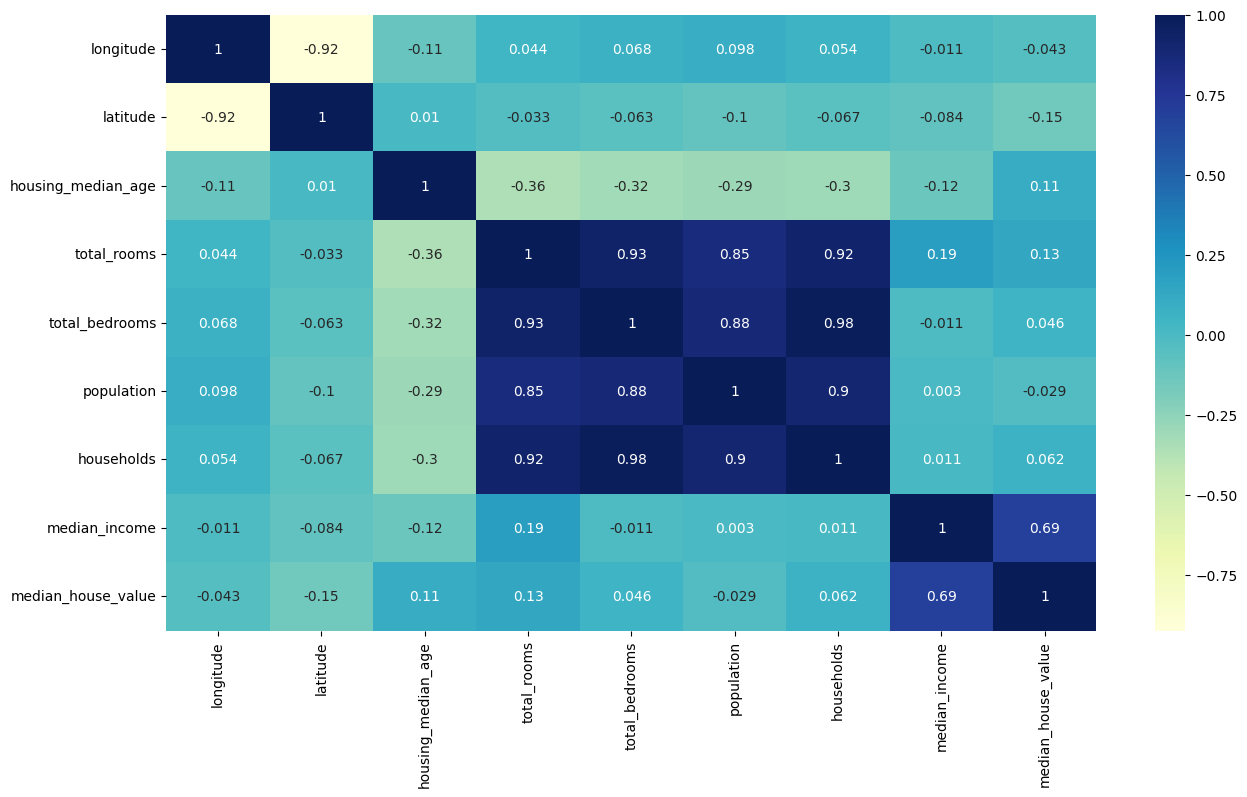

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")


In [13]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

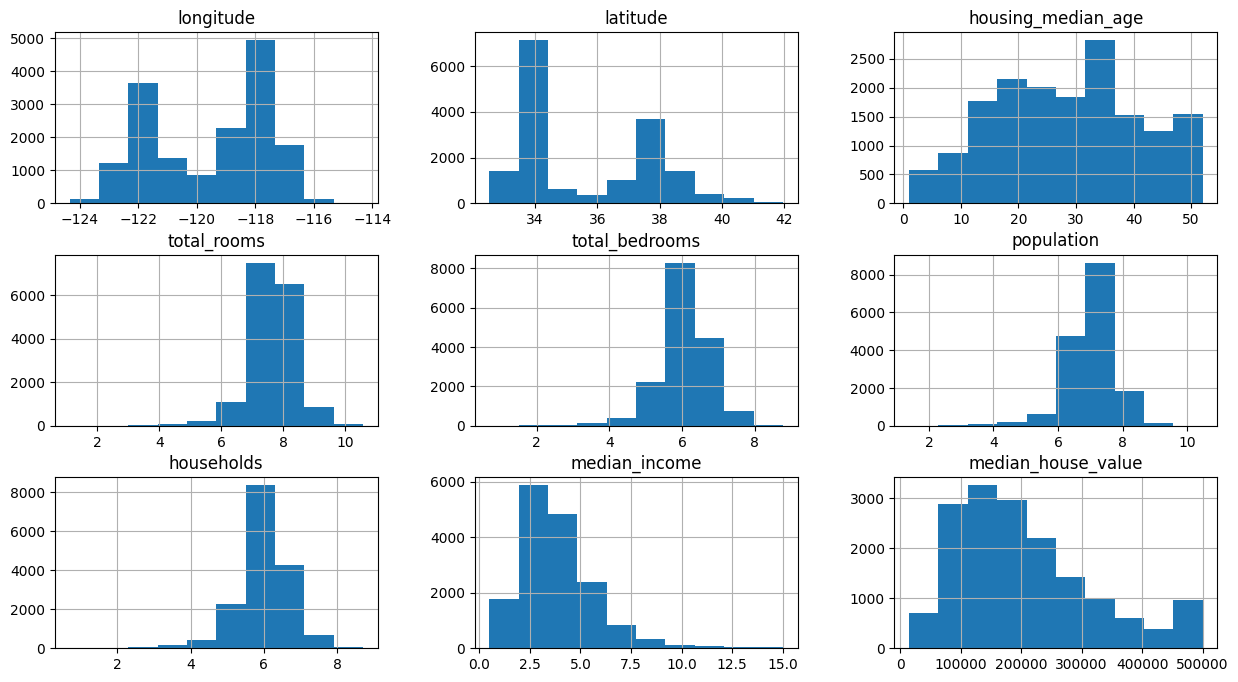

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
#train_data.ocean_proximity.value_counts()

<Axes: xlabel='latitude', ylabel='longitude'>

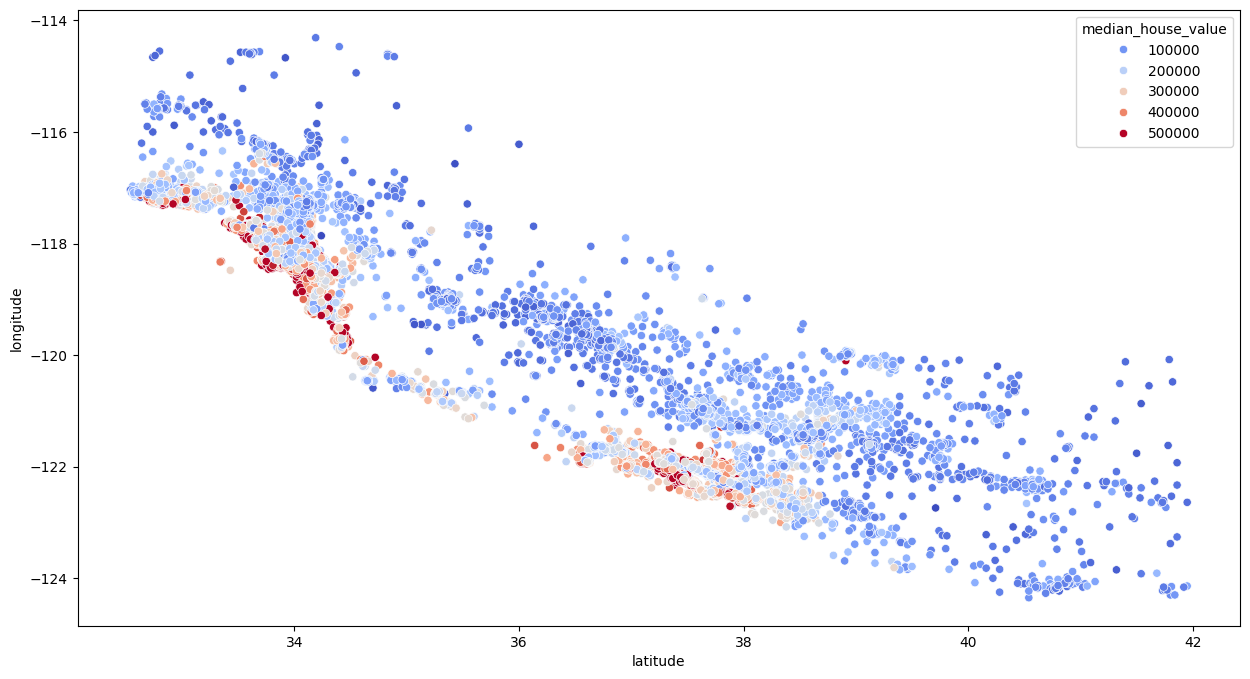

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data, hue="median_house_value",palette="coolwarm")

In [17]:
train_data['bedroom_radio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

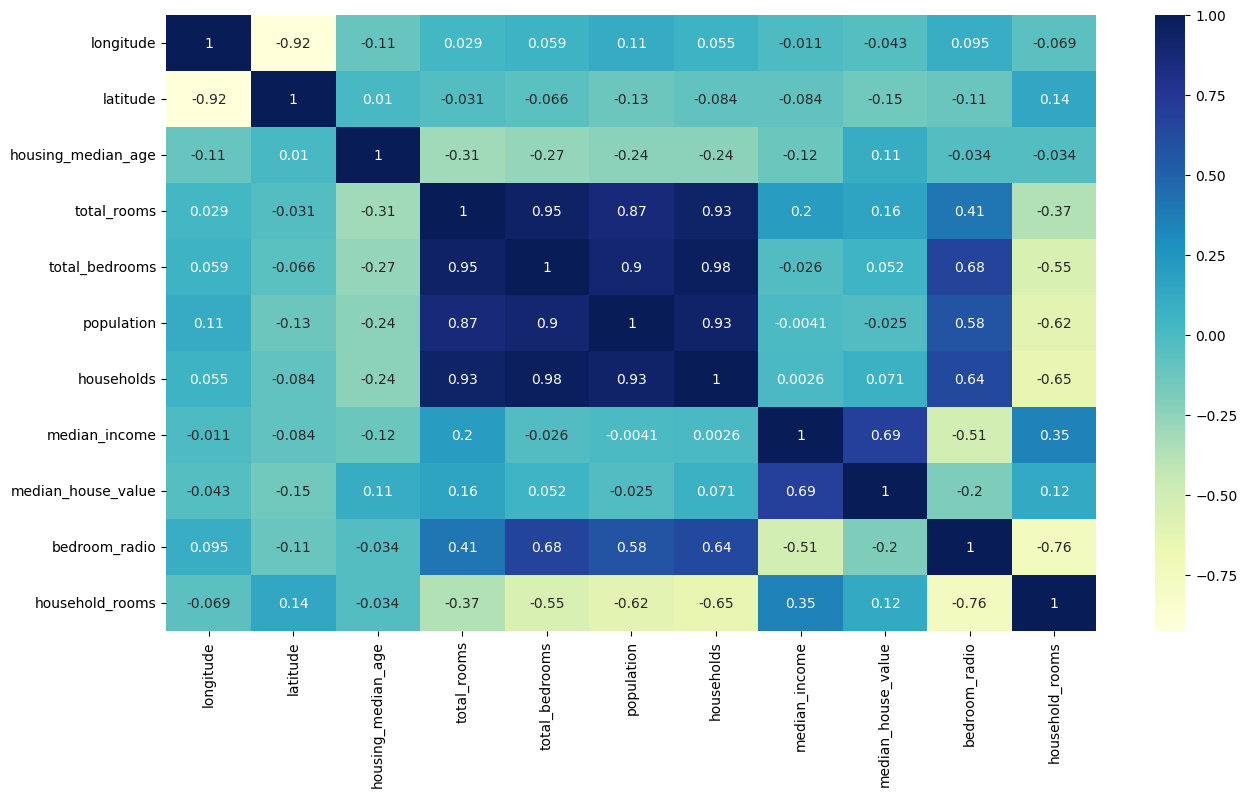

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s= scaler.fit_transform(x_train)

reg=LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [20]:
test_data =x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data['bedroom_radio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [21]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [22]:
x_test_s= scaler.fit_transform(x_test)

In [27]:
reg.score(x_test, y_test)

0.6628240884471374

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

In [25]:
forest.score(x_test, y_test)

0.8106301690019223